In [2]:
%load_ext autoreload
%autoreload 2
import os
os.environ["TERRA_CONFIG_PATH"] = "/home/sabri/code/domino/terra-config.json"
from tqdm import tqdm
import terra
import numpy as np
import meerkat as mk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from domino.data.mimic import build_dp, mimic_transform

from domino.sdm.george import GeorgeSDM

In [2]:
dp = build_dp.out(1267, load=True)

In [3]:
# get model to inspect
model_df = terra.out(1302).load()
model_df[
    (model_df["target"] == "Lung_Lesion_uzeros")
    & (model_df["correlate"] == "patient_orientation_rf")
]


,target,correlate,corr,num_examples,run_id
86,Lung_Lesion_uzeros,patient_orientation_rf,0.0,30000.0,1439
87,Lung_Lesion_uzeros,patient_orientation_rf,0.1,30000.0,1440
88,Lung_Lesion_uzeros,patient_orientation_rf,0.2,30000.0,1441
89,Lung_Lesion_uzeros,patient_orientation_rf,0.3,30000.0,1442
90,Lung_Lesion_uzeros,patient_orientation_rf,0.4,30000.0,1443
91,Lung_Lesion_uzeros,patient_orientation_rf,0.6,30000.0,1445
92,Lung_Lesion_uzeros,patient_orientation_rf,0.7,30000.0,1446
93,Lung_Lesion_uzeros,patient_orientation_rf,0.8,30000.0,1447


In [4]:

model = terra.get_artifacts(1446, "best_chkpt")["model"].load()
model =model.eval()

2d8a8525-19d0c810-045e1619-ef196132-cd4f1710
0
0


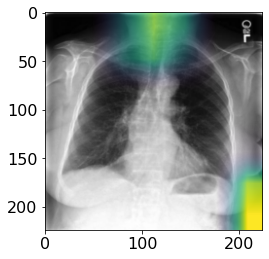

In [5]:
from domino.vis import get_gradcam
idx = 8
inp = dp["input_224"][idx]
print(dp["dicom_id"][idx])
print(dp["burned_in_annotation"][idx])
print(dp["Pleural_Effusion_uzeros"][idx])
get_gradcam(model=model, inp=dp["input_224"][idx], show=True);

In [23]:
# get model to inspect
target = "Lung_Lesion_uzeros"
correlate = "patient_orientation_rf"
acts_df = terra.out(1593).load()
acts_df[
    (acts_df["target"] == target)
    & (acts_df["correlate"] == correlate)
]


,target,correlate,corr,num_examples,run_id,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,trial_id,config/args,logdir
86,Lung_Lesion_uzeros,patient_orientation_rf,0.0,30000.0,1681,75.970737,False,NaN,NaN,1,...,75.970737,31788,pod-sabri-t4-4,10.92.5.3,75.970737,0,1,b9420_00086,"{'corr': 0.0, 'correlate': 'patient_orientatio...",/root/ray_results/_score_model_2021-07-08_21-0...
87,Lung_Lesion_uzeros,patient_orientation_rf,0.1,30000.0,1680,67.287553,False,NaN,NaN,1,...,67.287553,31786,pod-sabri-t4-4,10.92.5.3,67.287553,0,1,b9420_00087,"{'corr': 0.1, 'correlate': 'patient_orientatio...",/root/ray_results/_score_model_2021-07-08_21-0...
88,Lung_Lesion_uzeros,patient_orientation_rf,0.2,30000.0,1683,70.288950,False,NaN,NaN,1,...,70.288950,33065,pod-sabri-t4-4,10.92.5.3,70.288950,0,1,b9420_00088,"{'corr': 0.2, 'correlate': 'patient_orientatio...",/root/ray_results/_score_model_2021-07-08_21-0...
89,Lung_Lesion_uzeros,patient_orientation_rf,0.3,30000.0,1682,70.335390,False,NaN,NaN,1,...,70.335390,33064,pod-sabri-t4-4,10.92.5.3,70.335390,0,1,b9420_00089,"{'corr': 0.3, 'correlate': 'patient_orientatio...",/root/ray_results/_score_model_2021-07-08_21-0...
90,Lung_Lesion_uzeros,patient_orientation_rf,0.4,30000.0,1684,69.307691,False,NaN,NaN,1,...,69.307691,33180,pod-sabri-t4-4,10.92.5.3,69.307691,0,1,b9420_00090,"{'corr': 0.4, 'correlate': 'patient_orientatio...",/root/ray_results/_score_model_2021-07-08_21-0...
91,Lung_Lesion_uzeros,patient_orientation_rf,0.6,30000.0,1685,73.001519,False,NaN,NaN,1,...,73.001519,33239,pod-sabri-t4-4,10.92.5.3,73.001519,0,1,b9420_00091,"{'corr': 0.6000000000000001, 'correlate': 'pat...",/root/ray_results/_score_model_2021-07-08_21-0...
92,Lung_Lesion_uzeros,patient_orientation_rf,0.7,30000.0,1687,69.668144,False,NaN,NaN,1,...,69.668144,34447,pod-sabri-t4-4,10.92.5.3,69.668144,0,1,b9420_00092,"{'corr': 0.7000000000000001, 'correlate': 'pat...",/root/ray_results/_score_model_2021-07-08_21-0...
93,Lung_Lesion_uzeros,patient_orientation_rf,0.8,30000.0,1688,69.838316,False,NaN,NaN,1,...,69.838316,34442,pod-sabri-t4-4,10.92.5.3,69.838316,0,1,b9420_00093,"{'corr': 0.8, 'correlate': 'patient_orientatio...",/root/ray_results/_score_model_2021-07-08_21-0...


In [4]:
data_dp, _ = terra.out(1664, load=True)
data_dp["activation_model.layer4"] = data_dp["activation_layer4"]
target = terra.inp(1664)["target"]
correlate = terra.inp(1664)["correlate"]
terra.inp(1664)

{'dp': <terra.io.Artifact at 0x7f06338845e0>,
 'split': 'test',
 'layers': {'layer4': 'model.layer4'},
 'target': 'Pleural_Effusion_uzeros',
 'correlate': 'burned_in_annotation',
 'corr': 0.3,
 'num_examples': 30000.0,
 'model': <terra.io.Artifact at 0x7f0633884ac0>,
 'input_column': 'input_224',
 'id_column': 'dicom_id',
 'run_dir': '/home/sabri/terra/slice/tasks/evaluate/train/score_model/_runs/1664',
 'pbar': False,
 'num_workers': 7,
 'batch_size': 64}

In [3]:
sdm = GeorgeSDM(config={"n_slices": 5})

In [5]:
sdm.transform.__annotations__["alias"] = str

In [6]:
sdm.transform.__dict__

{'__wrapped__': <function domino.sdm.george.GeorgeSDM.transform(self, data_dp: meerkat.datapanel.DataPanel)>}

In [10]:
data_dp["target"] = data_dp[target]
data_dp["act"] = data_dp["activation_layer4"]
sdm.fit(data_dp)

In [12]:
out = sdm.transform(data_dp)

In [14]:
out

,dicom_id (NumpyArrayColumn),Pleural_Effusion_uzeros (NumpyArrayColumn),umap_0 (NumpyArrayColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),burned_in_annotation (NumpyArrayColumn),activation_layer4 (TensorColumn),act (TensorColumn),umap_1 (NumpyArrayColumn),activation_model.layer4 (TensorColumn),index (ListColumn),output (TensorColumn),slice_0 (NumpyArrayColumn),slice_1 (NumpyArrayColumn),slice_2 (NumpyArrayColumn),slice_3 (NumpyArrayColumn),slice_4 (NumpyArrayColumn)
0,18f0fd6d-f513afc9-e4aa8de2-bc5ac0d6-ea3daaff,0,3.425465,1,0,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",2.125801,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'160',torch.Tensor(shape=torch.Size([2])),0,1,0,0,0
1,7d5ef12b-34d86e32-207566d6-d5ed6f02-cd868f2c,0,3.896349,1,0,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",1.569957,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'161',torch.Tensor(shape=torch.Size([2])),0,1,0,0,0
2,7b43b8ff-190d3ca9-03cfbbd3-45ad3d0d-72d06c1c,0,4.823075,1,0,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",4.281926,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'981',torch.Tensor(shape=torch.Size([2])),0,1,0,0,0
3,2cc38dd6-d1f5970f-055155bc-e9e8fccd-8ec98168,0,3.236622,1,0,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",2.302063,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'983',torch.Tensor(shape=torch.Size([2])),0,1,0,0,0
4,2ae8ec41-067f24d2-3f3ea6b7-113cb63b-aa3cc9e0,0,5.039151,1,0,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",1.427356,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'1438',torch.Tensor(shape=torch.Size([2])),0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,4eab5702-5e51a961-a59e4e84-b5aa758f-4e367b89,1,5.955526,2,1,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",-0.778495,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'376429',torch.Tensor(shape=torch.Size([2])),0,0,1,0,0
3399,8011d9cb-8f3ea017-86ad36bd-5e7380ff-32005f00,1,7.942936,2,1,1,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",-0.780997,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'376430',torch.Tensor(shape=torch.Size([2])),0,0,1,0,0
3400,35deb322-043ec12f-b33e7567-530c7a88-8b213991,1,10.730945,2,1,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",0.069746,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'376764',torch.Tensor(shape=torch.Size([2])),0,0,1,0,0
3401,702ea80d-45e751b9-f310cea5-80c50417-c80de945,1,-3.902885,3,1,0,"torch.Tensor(shape=torch.Size([2048, 7, 7]))","torch.Tensor(shape=torch.Size([2048, 7, 7]))",1.748053,"torch.Tensor(shape=torch.Size([2048, 7, 7]))",'376865',torch.Tensor(shape=torch.Size([2])),0,0,0,1,0


<Figure size 720x720 with 0 Axes>

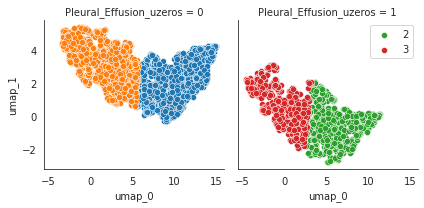

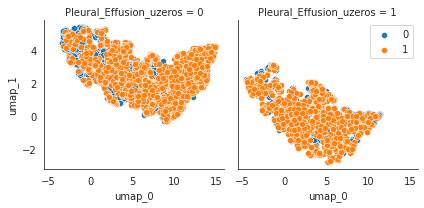

In [15]:
plt.figure(figsize=(10,10))
sns.set_style("white")
df = out[[
    "umap_0", 
    "umap_1", 
    "slices",
    target,
    correlate
]].to_pandas()
g = sns.FacetGrid(
    data=df, col=target, hue="slices"
)
g.map(
    sns.scatterplot,
    "umap_0", 
    "umap_1",
    #alpha=0.1,
    palette="Set2",
)
plt.legend()
g = sns.FacetGrid(
    data=df, col=target, hue=correlate
)
g.map(
    sns.scatterplot,
    "umap_0", 
    "umap_1",
    #alpha=0.1,
    palette="Set2",
)
plt.legend()

In [18]:
df[df["Lung_Lesion_uzeros"] == 1]

,george_umap_0,george_umap_1,george_slices,Lung_Lesion_uzeros,index
3282,2.084671,-0.725078,2,1,11574
3283,0.403494,-0.038163,2,1,17108
3284,0.663614,-0.122271,2,1,17111
3285,2.339928,-0.964262,2,1,23073
3286,2.216436,-0.695886,2,1,25805
...,...,...,...,...,...
3398,1.228580,0.173166,2,1,375904
3399,7.938544,-1.301670,3,1,375905
3400,2.347796,-0.501467,2,1,376077
3401,8.230016,-1.799758,3,1,376174


In [26]:
from stratification.cluster.george_cluster import GEORGECluster
from stratification.cluster.models.cluster import AutoKMixtureModel

In [29]:
kmeans = AutoKMixtureModel(cluster_method="kmeans", max_k=5, n_init=3)

In [31]:
kmeans.fit(data_dp["activation_model.layer4"].data.mean(axis=[-1, -2])[:, :3])

In [17]:
dp = mk.DataPanel(
    {
        "a": [1,2,3],
        "b": [1,2,3]
    }
)

In [18]:
dp["c"] = dp["a"]

In [19]:
dp["c"][0] = 10

In [20]:
dp

,a (NumpyArrayColumn),b (NumpyArrayColumn),index (ListColumn),c (NumpyArrayColumn)
0,10,1,'0',10
1,2,2,'1',2
2,3,3,'2',3
